### [link to original assignment description](https://github.com/datsoftlyngby/dat4sem2019spring-python-materials/blob/master/assignments/Assignment_4_Pandas.ipynb)

# Assignment 4: Pandas
##### This assignment is about data processing and plotting.

##### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. The assignment should fit in a single Jupyter Notebook.

Remember her to use the link provided when first registering your notebook with mybinder (not the url taken from your browsers adress field). See the notebook 12-Assignments for more information.

## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook. With the help of Pandas' DataFrame do the following

1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)

In [154]:
import pandas as pd
data = pd.read_csv('API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv', skiprows=4)

In [155]:
c_code_data = data[data['Country Name'].isin(['Argentina', 'Cote d\'Ivoire', 'United States'])]['Country Code']
c_code_data

7      ARG
39     CIV
249    USA
Name: Country Code, dtype: object

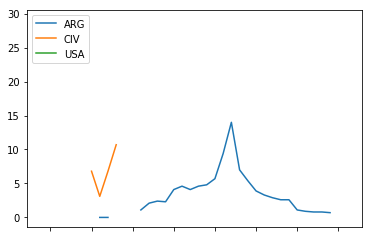

In [156]:
ts_data = data.iloc[c_code_data.index, 4:-1].T
ts_data = ts_data.rename(columns=dict(c_code_data))
ts_data.plot()

2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart

<BarContainer object of 10 artists>

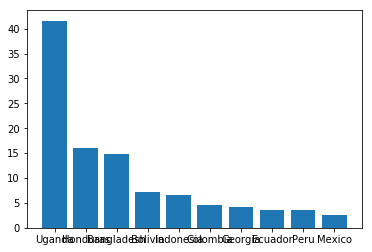

In [157]:
import matplotlib.pyplot as plt

year = '2016'
countries = data.sort_values('2016',ascending = False,na_position='last')['Country Name'].head(10)

rate_df = data[year][data['Country Name'].isin(countries)]
sorted_rate_df = rate_df.sort_values(ascending = False)

plt.bar(countries, sorted_rate_df)

3. Show the development of absolute poverty in all the central american countries. Hand in:

    * A description of what graphical representation you think is best for this task.
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html.
    * The actual graphical representation in a Jupyter Notebook.


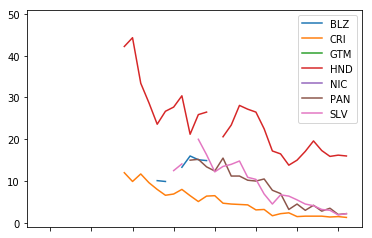

In [165]:
#We choose a line chart for each country, as this is an effective means of differing between them while allowing all results to be shown at the same time.
central_american_countries = ['Belize','Costa Rica','El Salvador','Guatemala','Honduras','Nicaragua','Panama']
central_american_df = data[data['Country Name'].isin(central_american_countries)]['Country Code']

ca_data = data.iloc[central_american_df.index, 4:-1].T
ca_data = ca_data.rename(columns=dict(central_american_df))
ca_data.plot()


4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
        A: A description of why that question is interesting
        B: A visualisation of the question in your Jupyter Notebook
      * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html